<a href="https://colab.research.google.com/github/Chitwan54/interview-question-data-science-/blob/master/Copy_of_WOWMart_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error
import tensorflow as tf
import keras
from statsmodels.tsa.stattools  import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
# Store the path of train and test file
train_path = "/content/TRAIN.csv"
test_path = "/content/TEST_FINAL.csv"
 
# Load the data
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [ ]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
# Check for null values
train_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [ ]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

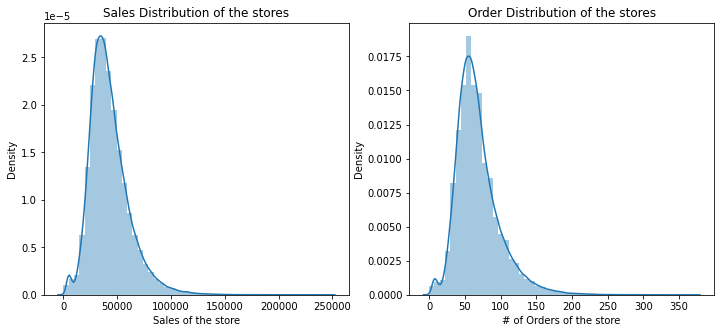

In [ ]:
# Check the distribution of Sales
figure, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(x=train_data['Sales'], ax=ax[0])
ax[0].set_xlabel("Sales of the store")
ax[0].set_title("Sales Distribution of the stores")
plt.grid()

# Check the distribution of Orders
sns.distplot(x=train_data['#Order'], ax=ax[1])
ax[1].set_xlabel("# of Orders of the store")
ax[1].set_title("Order Distribution of the stores")
plt.grid()

figure.show()

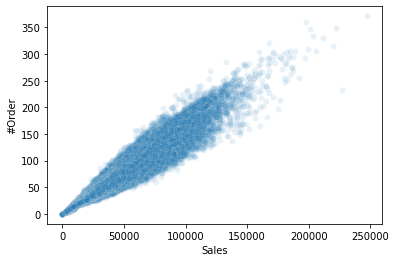

In [ ]:
# Check for correaltion between the orders and the sales
sns.scatterplot(data=train_data, x='Sales', y='#Order', alpha=0.1)
plt.show()

**Linear Relation can be observed**

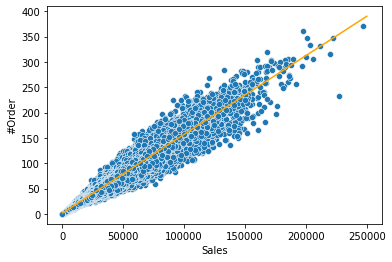

In [ ]:
# linear regression line
x_ = np.arange(0, 250000)

# build linear model
lr = LinearRegression()
lr.fit(train_data['Sales'].values.reshape(-1,1), train_data['#Order'].values.reshape(-1,1))

theta_0 = lr.intercept_
theta_1 = lr.coef_

# Regression Line
y_reg = theta_1*x_ +  theta_0

sns.scatterplot(data=train_data, x='Sales', y='#Order')
plt.plot(x_, y_reg.reshape(-1,), color='orange', label='Linear Regression Line')
plt.show()

In [ ]:
# Check minimum values in orders and sales
train_data['Sales'].min(), train_data['#Order'].min()

(0.0, 0)

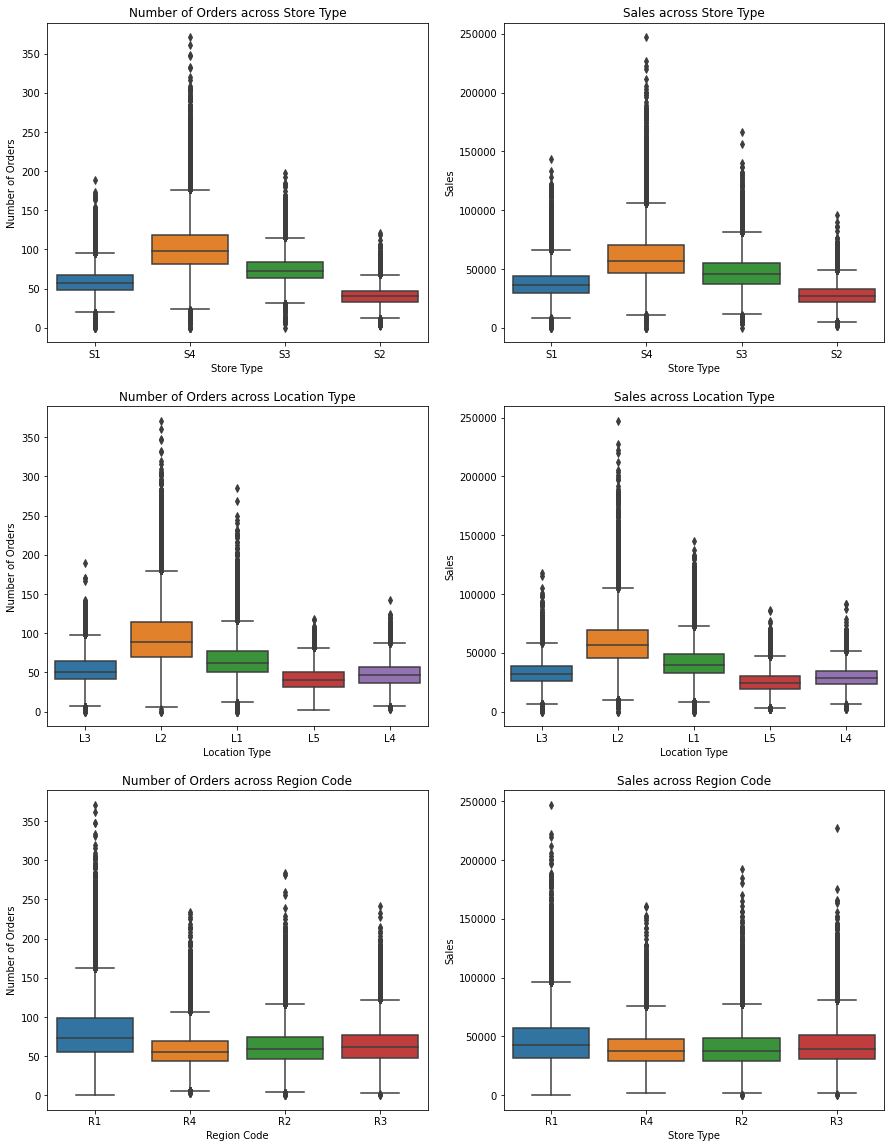

In [ ]:
# Distribution of Sales and Orders Across the Store Type, Location Type and Region Code
target_columns = ['#Order', 'Sales']
sales_columns = ['Store_Type', 'Location_Type', 'Region_Code']

figure, ax = plt.subplots(3, 2, figsize = (15,20))
data=train_data

# plot the boxplots

# 1. Sales and Orders across the store type
sns.boxplot(data=data, x='Store_Type', y='#Order', ax=ax[0, 0])
ax[0,0].set_xlabel("Store Type")
ax[0,0].set_ylabel("Number of Orders")
ax[0,0].set_title("Number of Orders across Store Type")

sns.boxplot(data=data, x='Store_Type', y='Sales', ax=ax[0, 1])
ax[0,1].set_xlabel("Store Type")
ax[0,1].set_ylabel("Sales")
ax[0,1].set_title("Sales across Store Type")

# 2. Sales and Orders across Location Type
sns.boxplot(data=data, x='Location_Type', y='#Order', ax=ax[1, 0])
ax[1,0].set_xlabel("Location Type")
ax[1,0].set_ylabel("Number of Orders")
ax[1,0].set_title("Number of Orders across Location Type")

sns.boxplot(data=data, x='Location_Type', y='Sales', ax=ax[1, 1])
ax[1,1].set_xlabel("Location Type")
ax[1,1].set_ylabel("Sales")
ax[1,1].set_title("Sales across Location Type")

# 3. Sales and Orders across Region Code
sns.boxplot(data=data, x='Region_Code', y='#Order', ax=ax[2, 0])
ax[2,0].set_xlabel("Region Code")
ax[2,0].set_ylabel("Number of Orders")
ax[2,0].set_title("Number of Orders across Region Code")

sns.boxplot(data=data, x='Region_Code', y='Sales', ax=ax[2, 1])
ax[2,1].set_xlabel("Store Type")
ax[2,1].set_ylabel("Sales")
ax[2,1].set_title("Sales across Region Code")

figure.show()

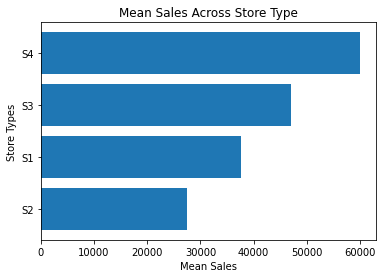

In [ ]:
# PLotting Average Sales across store type
data_1 = train_data.groupby('Store_Type').mean()['Sales'].sort_values()
plt.barh(y=data_1.index, width=data_1)
plt.xlabel("Mean Sales")
plt.ylabel("Store Types")
plt.title("Mean Sales Across Store Type")
plt.show()

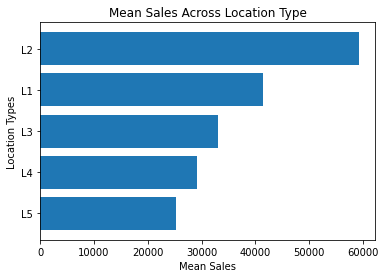

In [ ]:
# Plotting mean sales across Location type
data_1 = train_data.groupby('Location_Type').mean()['Sales'].sort_values()
plt.barh(y=data_1.index, width=data_1)
plt.xlabel("Mean Sales")
plt.ylabel("Location Types")
plt.title("Mean Sales Across Location Type")
plt.show()

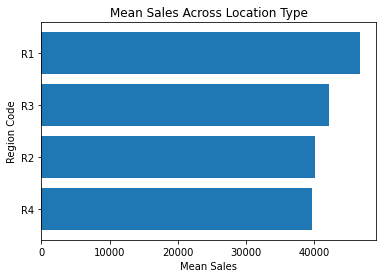

In [ ]:
# Plotting mean sales across Region Code
data_1 = train_data.groupby('Region_Code').mean()['Sales'].sort_values()
plt.barh(y=data_1.index, width=data_1)
plt.xlabel("Mean Sales")
plt.ylabel("Region Code")
plt.title("Mean Sales Across Location Type")
plt.show()

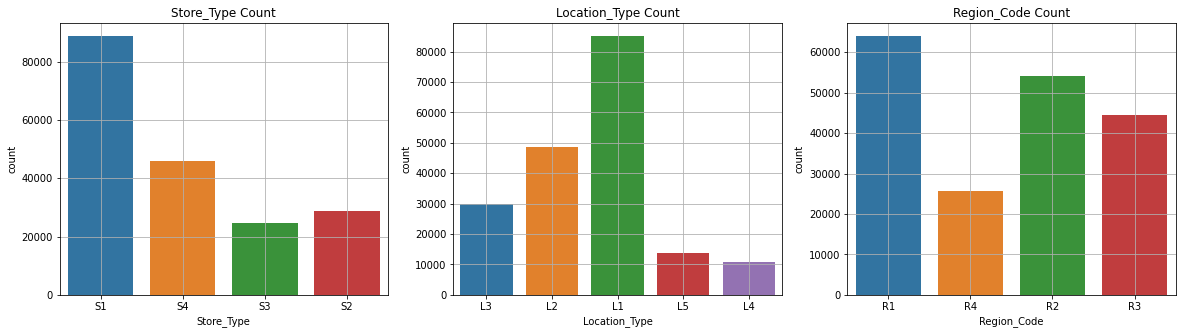

In [ ]:
# Visualisng the countplot for each store type and location type
figure = plt.figure(figsize=(20, 5))
for i, col in enumerate(sales_columns):
  plt.subplot(1, 3, i+1)
  sns.countplot(data=train_data, x = col)
  plt.title("{} Count".format(col))
  plt.grid()

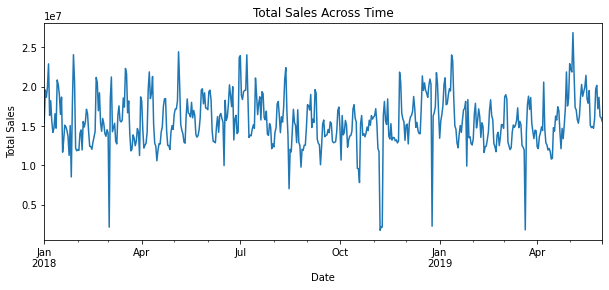

In [ ]:
plt.figure(figsize=(10, 4))
train_data.groupby('Date').sum()['Sales'].plot()
plt.ylabel("Total Sales")
plt.title("Total Sales Across Time")
plt.show()

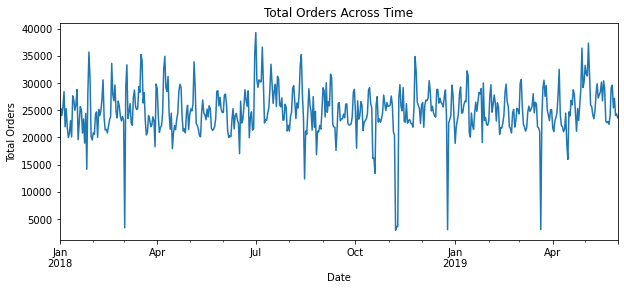

In [ ]:
plt.figure(figsize=(10, 4))
train_data.groupby('Date').sum()['#Order'].plot()
plt.ylabel("Total Orders")
plt.title("Total Orders Across Time")
plt.show()

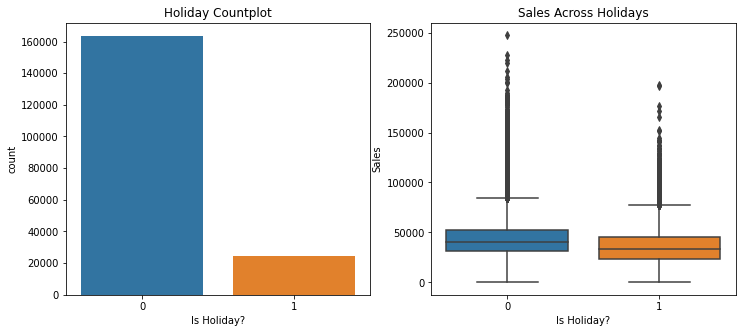

In [ ]:
# Plot boxplots for Sales on Holiday and non holiday days
figure, ax = plt.subplots(1,2,figsize=(12, 5))
sns.countplot(data=train_data, x='Holiday', ax=ax[0])
ax[0].set_xlabel("Is Holiday?")
ax[0].set_title("Holiday Countplot")
sns.boxplot(data=train_data, x='Holiday', y='Sales', ax=ax[1])
ax[1].set_xlabel("Is Holiday?")
ax[1].set_ylabel("Sales")
ax[1].set_title("Sales Across Holidays")
figure.show()

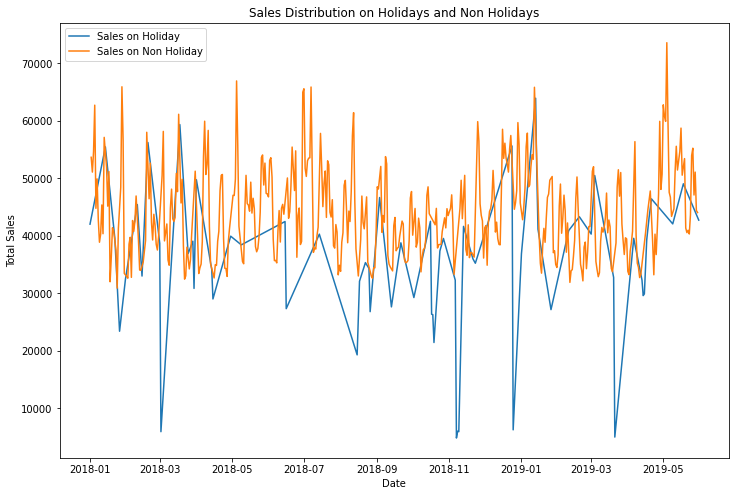

In [ ]:
# Visualise sales across holidays and non holidays
holiday_data = train_data[train_data['Holiday'] == 1][['Holiday', 'Date', 'Sales']]
non_holiday_data =  train_data[train_data['Holiday'] == 0][['Holiday', 'Date', 'Sales']]


# plot the data
plt.figure(figsize=(12,8))
plt.plot(holiday_data.groupby('Date').mean()['Sales'], label = 'Sales on Holiday')
plt.plot(non_holiday_data.groupby('Date').mean()['Sales'], label = 'Sales on Non Holiday')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Distribution on Holidays and Non Holidays")
plt.legend()
plt.show()

**Sales on Holidat have deep valleys as compared to Sales on Non Holidays**

In [ ]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


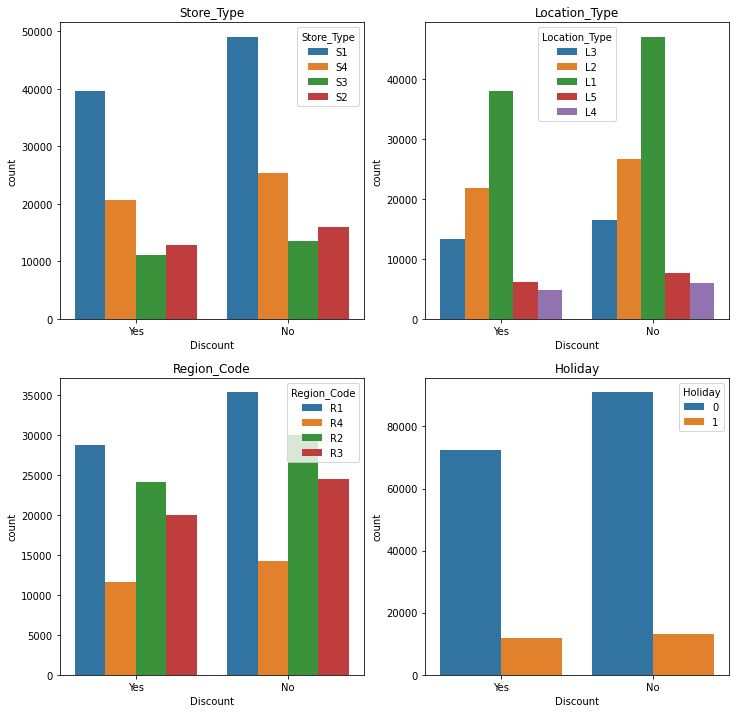

In [ ]:
# Plot the distribution of Discount across Holiday, Location_Type, Store_Type, Region_Code
sales_columns.append('Holiday')
figure = plt.figure(figsize = (12, 12))
for i, col in enumerate(sales_columns):
  plt.subplot(2, 2, i+1)
  sns.countplot(data=train_data, x='Discount', hue=col)
  plt.title("{}".format(col))
plt.show()

Almost equal distribution across all verticals

In [ ]:
# Create features
train_data['Day'] = train_data['Date'].dt.day
train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] = train_data['Date'].dt.year

In [ ]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Day,Month,Year
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,1,2018
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,1,2018
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,1,2018
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,1,2018
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,1,2018


We have data for all 12 months for the year 2018 but only for 5 months for the year 2019. Next, compare the sales of first 5 months across both the years

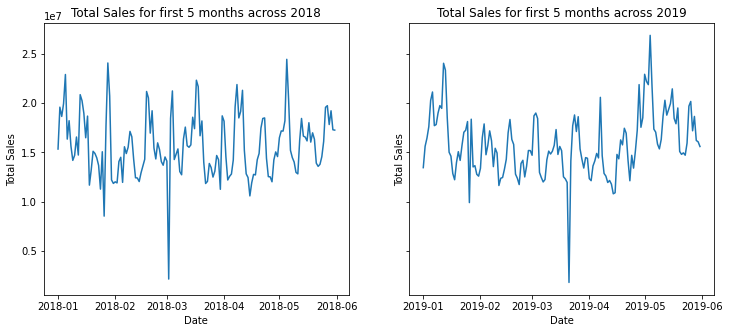

In [ ]:
five_months_data_2018 = train_data[(train_data['Year'] == 2018) & train_data['Month'].isin([1,2,3,4,5])]
five_months_data_2019 = train_data[(train_data['Year'] == 2019) & train_data['Month'].isin([1,2,3,4,5])]

# plot the sales
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,5))
ax[0].plot(five_months_data_2018.groupby('Date').sum()['Sales'], label='2018 Sales')
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Total Sales")
ax[0].set_title("Total Sales for first 5 months across 2018")

ax[1].plot(five_months_data_2019.groupby('Date').sum()['Sales'], label='2019 Sales')
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Total Sales")
ax[1].set_title("Total Sales for first 5 months across 2019")

fig.show()

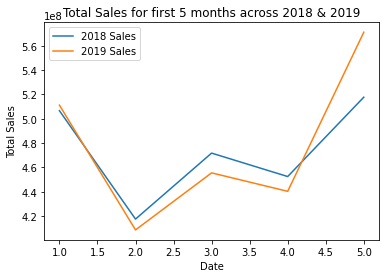

In [ ]:
plt.plot(five_months_data_2018.groupby('Month').sum()['Sales'], label='2018 Sales')
plt.plot(five_months_data_2019.groupby('Month').sum()['Sales'], label='2019 Sales')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Total Sales for first 5 months across 2018 & 2019")
plt.legend()
plt.show()

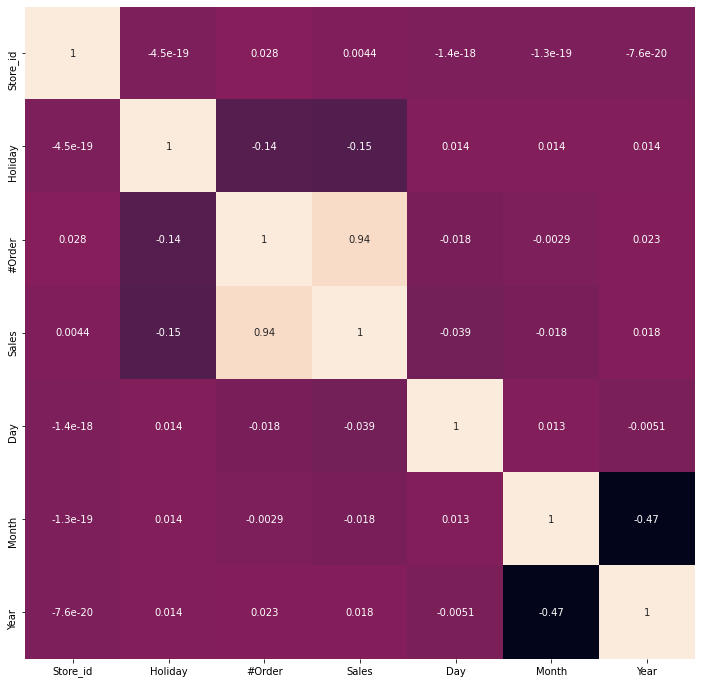

In [ ]:
# Plot correlation heatmap
corr_matrix = train_data.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

In [ ]:
# Encode the categorical data
le = LabelEncoder()
train_data['Discount'] = le.fit_transform(train_data['Discount'])

In [ ]:
# drop the ID and Date Column
train_data.drop(['ID'], axis=1, inplace=True)

In [ ]:
# Encode the Nominal Data
train_data = pd.get_dummies(train_data)

In [ ]:
# Perform same preprocessing on the test set
test_data['Date'] = pd.to_datetime(test_data['Date']) 
test_data['Day'] = test_data['Date'].dt.day
test_data['Month'] = test_data['Date'].dt.month
test_data['Year'] = test_data['Date'].dt.year

In [ ]:
test_data['Discount'] = le.transform(test_data['Discount'])
test_data.drop(['ID'], axis=1, inplace=True)

In [ ]:
test_data = pd.get_dummies(test_data)

In [ ]:
set(test_data.columns)&set(train_data.columns)

{'Date',
 'Day',
 'Discount',
 'Holiday',
 'Location_Type_L1',
 'Location_Type_L2',
 'Location_Type_L3',
 'Location_Type_L4',
 'Location_Type_L5',
 'Month',
 'Region_Code_R1',
 'Region_Code_R2',
 'Region_Code_R3',
 'Region_Code_R4',
 'Store_Type_S1',
 'Store_Type_S2',
 'Store_Type_S3',
 'Store_Type_S4',
 'Store_id',
 'Year'}

In [ ]:
# Build the baseline model
X = train_data.drop(['#Order', 'Sales'], axis=1)
y = train_data['Sales']

In [ ]:
X.shape, test_data.shape

((188340, 20), (22265, 20))



1.   Model 1, Using ARIMA/SARIMA to Forecast the #Orders and then use it as a predictor along with other predictors to Forecast the Sales.



# Using ARIMA/SARIMA to forecast the #Orders

In [ ]:
order_data = train_data[['Date', '#Order']]

In [ ]:
# Plotting the 7 day rolling mean and standard deviation to check for stationarity
order_data['rolling_mean'] = order_data['#Order'].rolling(7).mean()
order_data['rolling_std'] = order_data['#Order'].rolling(7).std()

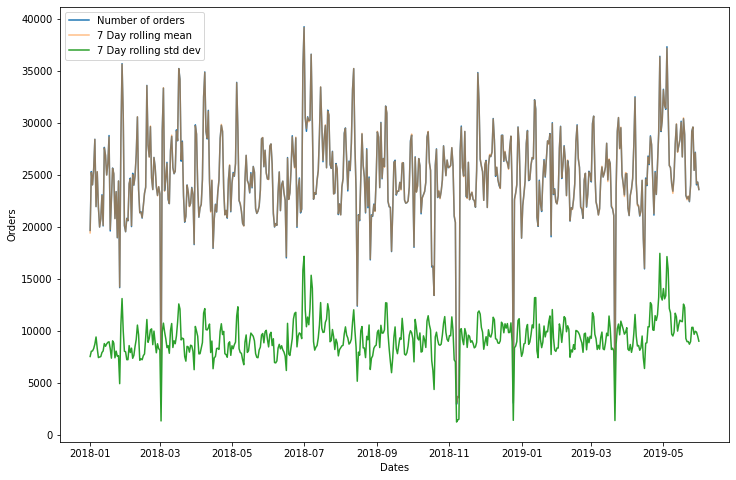

In [ ]:
plt.figure(figsize=(12,8))
plotting_data = order_data.groupby('Date').sum()
plt.plot(plotting_data.index, plotting_data['#Order'], label= "Number of orders")
plt.plot(plotting_data.index, plotting_data['rolling_mean'], label = "7 Day rolling mean", alpha=0.5)
plt.plot(plotting_data.index, plotting_data['rolling_std'], label = "7 Day rolling std dev")
plt.xlabel("Dates")
plt.ylabel("Orders")
plt.legend()
plt.show()

In [ ]:
# Hypothesis testing using ADfuller test

# H0: Data is non stationary
# H1: Data is stationary

def adfuller_test(data, alpha=0.05):
  results = adfuller(data)
  p_value = results[1]
  print("P Value is : {}".format(p_value))
  # check if p-value is less than alpha value
  if p_value < alpha:
    print("Null Hypothesis Rejected")
  else:
    print("Null Hypothesis Accepted")

# Call the function
adfuller_test(order_data['#Order'])

P Value is : 2.087864633792196e-28
Null Hypothesis Rejected


**Data is Stationary**

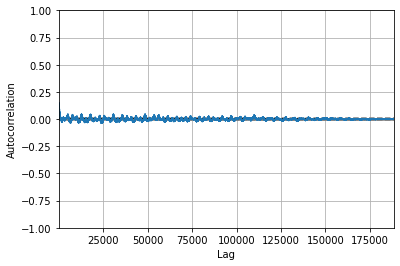

In [ ]:
# plot the autocorrelation plot
autocorrelation_plot(order_data['#Order'])
#plt.xlim(0,10)
plt.show()

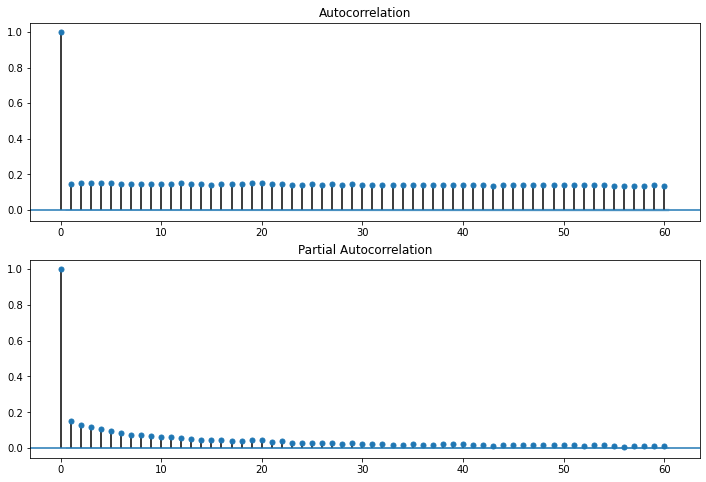

In [ ]:
# Plot the acf plot and pacf plot for finding AR and MA lags

# AR lags :-> PACF plot
# MA lags :-> ACF plot

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(order_data['#Order'], lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(order_data['#Order'], lags=60, ax=ax2)

AR lags (p) = 1
MA lags (q) = 1
Differencing (d) = 0

In [ ]:
# Build the model
trainlen = int(0.70*order_data.shape[0])

# Split the data
X = order_data['#Order'].iloc[ : trainlen]
y = order_data['#Order'].iloc[trainlen : ]

# Builda the model
arima_model = ARIMA(X, order=(1,0,1))
results = arima_model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 #Order   No. Observations:               131838
Model:                     ARMA(1, 1)   Log Likelihood             -624232.310
Method:                       css-mle   S.D. of innovations             27.547
Date:                Fri, 17 Sep 2021   AIC                        1248472.621
Time:                        15:21:33   BIC                        1248511.778
Sample:                             0   HQIC                       1248484.358
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           67.6184      1.214     55.710      0.000      65.239      69.997
ar.L1.#Order     0.9985      0.000   5831.417      0.000       0.998       0.999
ma.L1.#Order    -0.9751      0.001  -1476.963      0.000      -0.976      -0.974
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1            1.0255           +0.0000j            1.0255            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# Make predictions
predictions = results.predict(start=131838, end=188339, dynamic=True)

In [ ]:
# Compute error
msle = mean_squared_log_error(y, predictions)
print("Mean Squared Log Error for the ARIMA model {:.2f}".format(msle*1000))

Mean Squared Log Error for the ARIMA model 204.25


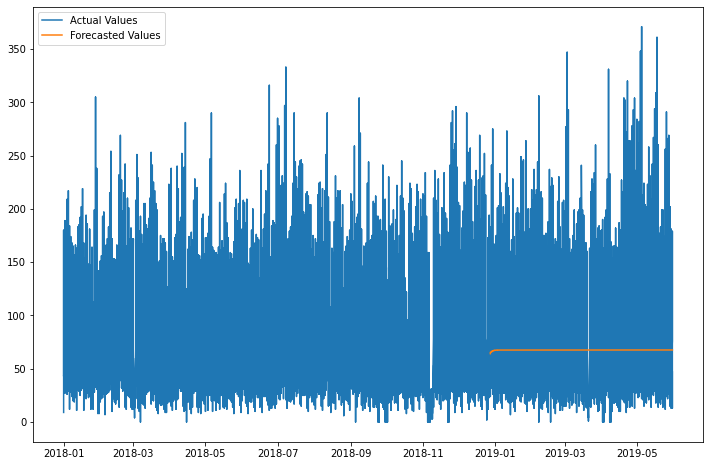

In [ ]:
# Plot the forecast
order_data['Forecasts'] = predictions
plt.figure(figsize=(12,8))
plt.plot(order_data['Date'], order_data['#Order'], label='Actual Values')
plt.plot(order_data['Date'], order_data['Forecasts'], label='Forecasted Values')
plt.legend()
plt.show()

In [ ]:
order_data['Error'] = np.abs(order_data['#Order'] - order_data['Forecasts'])
predicted_data = order_data.dropna(axis=0)

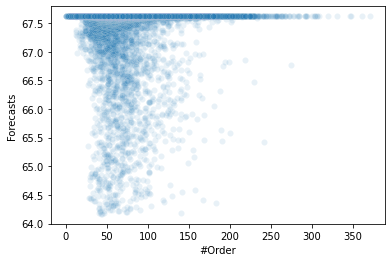

In [ ]:
# plot the predictions
sns.scatterplot(data=predicted_data, x='#Order', y='Forecasts', alpha=0.1)
plt.show()

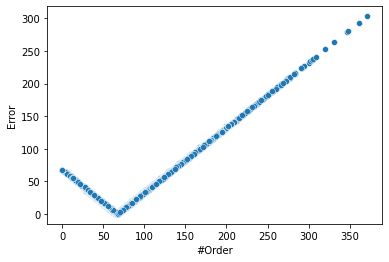

In [ ]:
sns.scatterplot(data=order_data, x='#Order', y='Error')
plt.show()

In [ ]:
predicted_data.corr()

,#Order,rolling_mean,rolling_std,Forecasts,Error
#Order,1.000000,0.486482,0.325842,-0.008896,0.578422
rolling_mean,0.486482,1.000000,0.670096,-0.017895,0.195889
rolling_std,0.325842,0.670096,1.000000,0.003742,0.321724
Forecasts,-0.008896,-0.017895,0.003742,1.000000,0.004505
Error,0.578422,0.195889,0.321724,0.004505,1.000000


#Building Model without Orders

In [ ]:
final_data = train_data.drop(['#Order', 'Date'], axis=1)
final_test_data = test_data.drop(['Date'], axis=1)

In [ ]:
final_data.shape, final_test_data.shape

((188340, 20), (22265, 19))

In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(['Sales'], axis=1), final_data['Sales'], test_size=0.2, random_state=42)

In [ ]:
# Create a function to compute metrics
def compute_mlse(model, model_name, X_test, y_test, data_type = 'Test'):

  # make predictions
  predictions = model.predict(X_test)
  msle = mean_squared_log_error(y_test, predictions)*1000
  return {model_name + '_' + data_type : msle}

In [ ]:
# 1. KNN
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
print("Training set results : {}".format(compute_mlse(knn_reg, 'KNN', X_train, y_train, 'Train')))
print("Testing set results : {}".format(compute_mlse(knn_reg, 'KNN', X_test, y_test)))

Training set results : {'KNN_Train': 93.36313364512735}
Testing set results : {'KNN_Test': 120.82393078920589}


In [ ]:
#2. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Training set results : {}".format(compute_mlse(lr, 'LinearRegression', X_train, y_train, 'Train')))
print("Testing set results : {}".format(compute_mlse(lr, 'LinearRegression', X_test, y_test)))

Training set results : {'LinearRegression_Train': 117.94870084556811}
Testing set results : {'LinearRegression_Test': 111.66055799016355}


In [ ]:
# 3. Decision Tree
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print("Training set results : {}".format(compute_mlse(dt_reg, 'DecisionTree Regression', X_train, y_train, 'Train')))
print("Testing set results : {}".format(compute_mlse(dt_reg, 'DecisionTree Regression', X_test, y_test)))

Training set results : {'DecisionTree Regression_Train': 0.0}
Testing set results : {'DecisionTree Regression_Test': 75.35244744841049}


In [ ]:
# 4. Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print("Training set results : {}".format(compute_mlse(rf_reg, 'Random Forest Regression', X_train, y_train, 'Train')))
print("Testing set results : {}".format(compute_mlse(rf_reg, 'Random Forest Regression', X_test, y_test)))

Training set results : {'Random Forest Regression_Train': 16.90846372580431}
Testing set results : {'Random Forest Regression_Test': 47.02321805200151}


In [ ]:
# 5. Extra Trees Regressor
ext_reg = ExtraTreesRegressor()
ext_reg.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print("Training set results : {}".format(compute_mlse(ext_reg, 'Extra Trees Regression', X_train, y_train, 'Train')))
print("Testing set results : {}".format(compute_mlse(ext_reg, 'Extra Trees Regression', X_test, y_test)))

Training set results : {'Extra Trees Regression_Train': 3.7991051471768816e-06}
Testing set results : {'Extra Trees Regression_Test': 53.08395372837789}


In [ ]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

[16:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print("Training set results : {}".format(compute_mlse(xgb_reg, 'XGBoost', X_train, y_train, 'Train')))
print("Testing set results : {}".format(compute_mlse(xgb_reg, 'XGBoost', X_test, y_test)))

Training set results : {'XGBoost_Train': 98.10334936933685}
Testing set results : {'XGBoost_Test': 92.3625590832936}


In [ ]:
# make predictions using Random Forest
rf_predictions_1 = rf_reg.predict(final_test_data)

In [ ]:
rf_predictions_1

array([69421.11, 66876.48, 71699.94, ..., 42612.57, 31820.4 , 33400.35])

In [ ]:
# Make Submissions
ID = test_data['ID'].values.reshape(-1,1)
results = np.concatenate([ID, rf_predictions_1.reshape(-1,1)], axis=1)
rf_submissions_1 = pd.DataFrame(results, columns=['ID', 'Sales'])

In [ ]:
rf_submissions_1.to_csv("/content/rf_submission_1.csv", index=False)

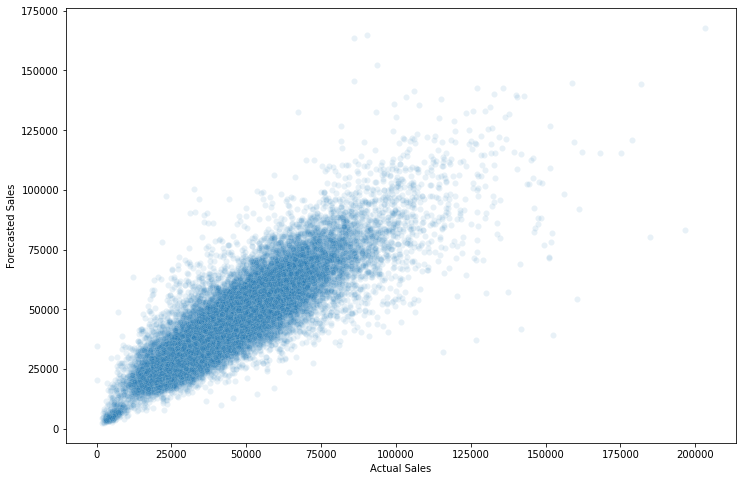

In [ ]:
# plot the predictions and actual values
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_test, y=rf_reg.predict(X_test), alpha=0.1)
plt.xlabel("Actual Sales")
plt.ylabel("Forecasted Sales")
plt.show()

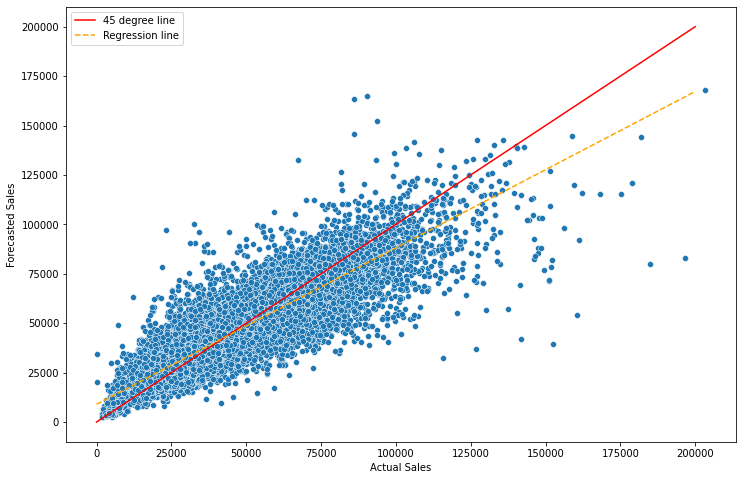

In [ ]:
# plot a regression line and the 45 degree line
x_ = np.arange(0,200000)
y_ = x_

# regression line
lr_2 = LinearRegression()
lr_2.fit(y_test.values.reshape(-1,1), rf_reg.predict(X_test).reshape(-1,1))

y_reg = lr_2.coef_*x_ + lr_2.intercept_
y_reg = y_reg.reshape(-1,1)

plt.figure(figsize=(12,8))
sns.scatterplot(x=y_test, y=rf_reg.predict(X_test))
plt.plot(x_, y_, c='r', label='45 degree line')
plt.plot(x_, y_reg, '--', c='orange', label='Regression line')
plt.xlabel("Actual Sales")
plt.ylabel("Forecasted Sales")
plt.legend()
plt.show()

In [ ]:
# Convert to datetime
test_data['Date'] = pd.to_datetime(test_data['Date'])

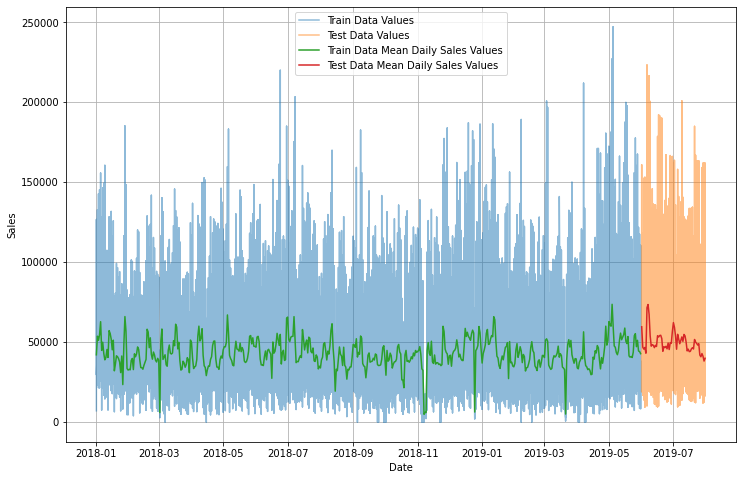

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(train_data['Date'], train_data['Sales'], label='Train Data Values', alpha=0.5)
plt.plot(test_data['Date'], rf_submissions_1['Sales'], label='Test Data Values', alpha=0.5)
plt.plot(train_data.groupby('Date').mean().index, train_data.groupby('Date').mean().Sales, label='Train Data Mean Daily Sales Values')
plt.plot(test_data_copy.groupby('Date').mean().index, test_data_copy.groupby('Date').mean().Sales, label='Test Data Mean Daily Sales Values')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# copy the data
test_data_copy = test_data.copy()
test_data_copy['Sales'] = rf_predictions_1

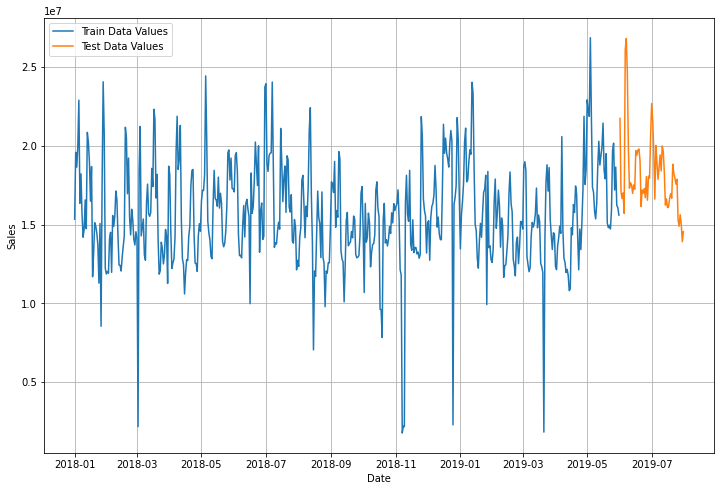

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(train_data.groupby('Date').sum().index, train_data.groupby('Date').sum().Sales, label='Train Data Values')
plt.plot(test_data_copy.groupby('Date').sum().index, test_data_copy.groupby('Date').sum().Sales, label='Test Data Values')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.legend()
plt.show()

**Next Step, remove outliers and build the model again.**